**Outliers**  are data points that differ significantly from other observations in a dataset.
   - **Importance:** Identifying outliers is crucial in data preprocessing to ensure data quality, as they can skew results in statistical analyses.
   - **Common Causes:**
     - Data entry errors.
     - Experimental errors.
     - Natural variations.

#### **Methods to Identify Outliers**

**Interquartile Range (IQR) Method:**

     - Identifies outliers by measuring the spread of the middle 50% of the data.
     - Q1 (25th Percentile): The value below which 25% of the data falls.
     - Q3 (75th Percentile): The value below which 75% of the data falls.
     - IQR: The difference between Q3 and Q1, representing the middle 50% of the data.
     Formula: ( IQR = Q3 - Q1 )

- Lower Bound: Any value below Q1 - 1.5 * IQR is considered an
outlier.
- Upper Bound: Any value above Q3 + 1.5 * IQR is considered an
outlier.



In [ ]:
import pandas as pd

# Example data (Extended dataset)
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95]
}
df = pd.DataFrame(data)
df



,Age
0,22
1,25
2,47
3,35
4,46
5,55
6,67
7,23
8,30
9,78


In [ ]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Calculate the lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify the outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display the results
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers detected:", outliers['Age'].tolist())

Q1 (25th Percentile): 29.25
Q3 (75th Percentile): 83.75
IQR: 54.5
Lower Bound: -52.5
Upper Bound: 165.5
Outliers detected: [200]


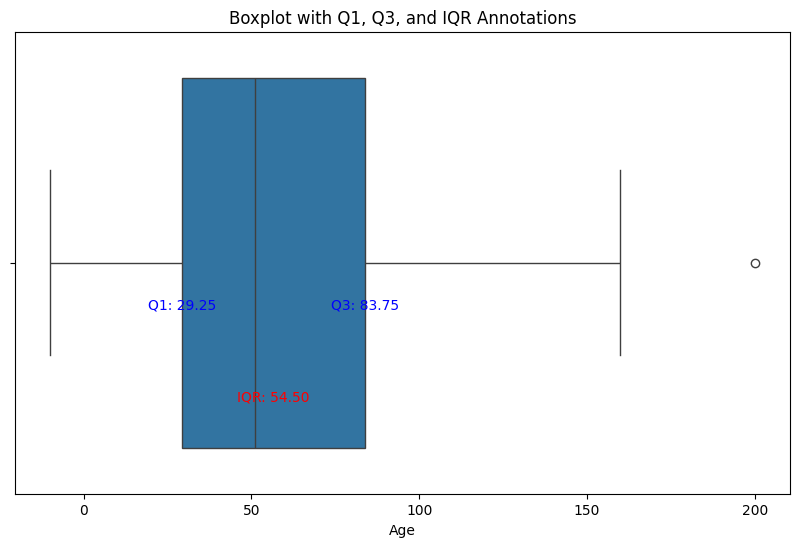

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

# Add text annotations for Q1, Q3, and IQR
plt.text(Q1, 0.1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='blue')
plt.text(Q3, 0.1, f'Q3: {Q3:.2f}', horizontalalignment='center', color='blue')
plt.text((Q1 + Q3) / 2, 0.3, f'IQR: {IQR:.2f}', horizontalalignment='center', color='red')

# Set labels and title
plt.title("Boxplot with Q1, Q3, and IQR Annotations")
plt.xlabel("Age")

# Display the plot
plt.show()

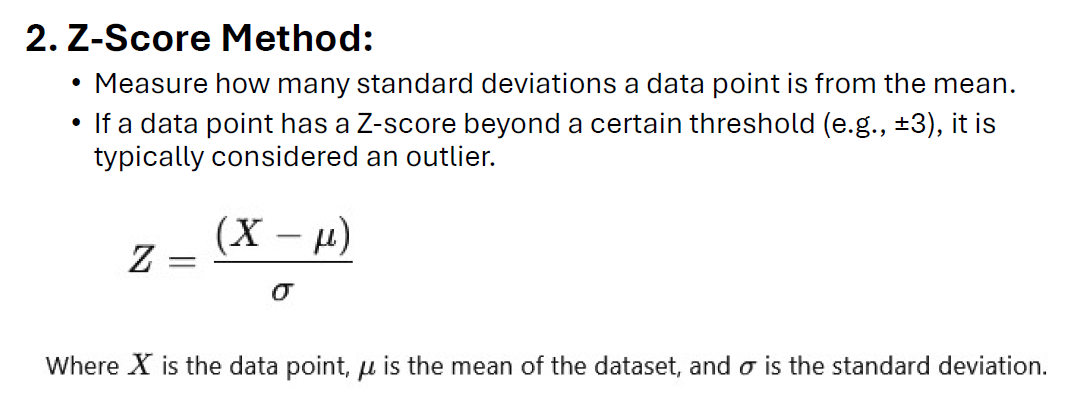

In [ ]:
import pandas as pd
from scipy import stats

# Example dataset with potential outliers
data = {
    'Value': [10, 12, 12, 13, 12, 11, 12, 14, 13, 15, 16, 18, 300, -100]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Calculate the Z-scores for each data point
df['Z_score'] = stats.zscore(df['Value'])

# Define the threshold for identifying outliers
threshold = 3  # Common threshold is Z > 3 or Z < -3

# Identify outliers
outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]

# Display the DataFrame with Z-scores
print("Data with Z-scores:")
print(df)

# Display the outliers
print("\nOutliers detected:")
print(outliers)

Data with Z-scores:
    Value   Z_score
0      10 -0.191071
1      12 -0.166530
2      12 -0.166530
3      13 -0.154259
4      12 -0.166530
5      11 -0.178800
6      12 -0.166530
7      14 -0.141988
8      13 -0.154259
9      15 -0.129718
10     16 -0.117447
11     18 -0.092906
12    300  3.367404
13   -100 -1.540837

Outliers detected:
    Value   Z_score
12    300  3.367404


3. Visual Methods (Scatter Plot, Histogram):
- Scatter Plot: Visualization that display the relationship between two
variables.
- Outliers are points that far from the general cluster of data.
- Histogram: Visualization that display the frequency distribution of data.
- Outliers may appear as bars that are isolated from the rest of the data distribution.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)
df

,Age,Salary
0,22,30
1,25,35
2,47,47
3,35,50
4,46,52
5,55,65
6,67,78
7,23,40
8,30,45
9,78,85


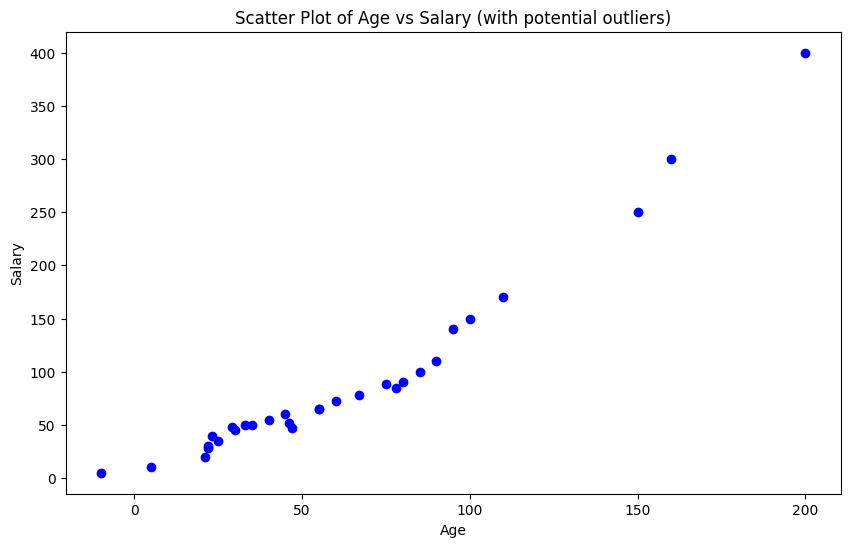

In [ ]:
# Scatter Plot: Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', label='Data Points')
plt.title("Scatter Plot of Age vs Salary (with potential outliers)")
plt.xlabel('Age')
plt.ylabel('Salary')

# Show the scatter plot
plt.show()

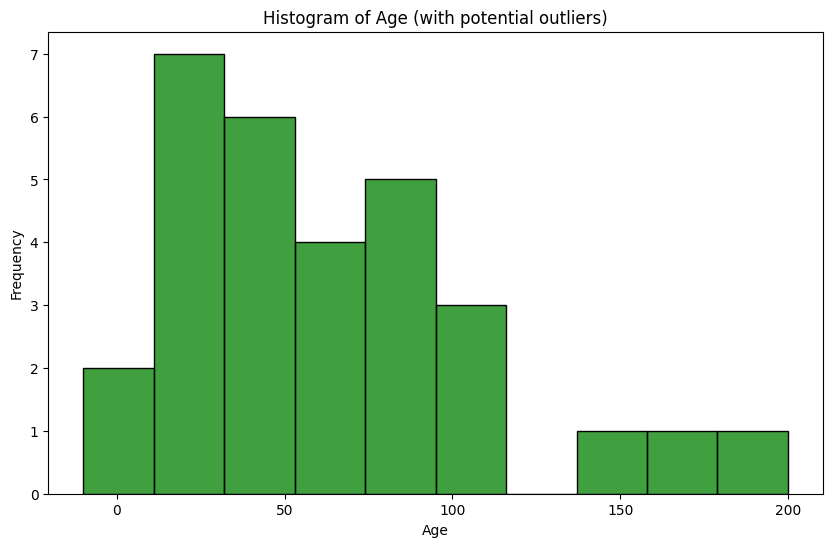

In [ ]:
# Histogram for 'Age' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='green')
plt.title('Histogram of Age (with potential outliers)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

4. Density-Based Methods (DBSCAN):
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is
an unsupervised learning algorithm that can identify outliers by
considering points that do not belong to any cluster.

Outliers detected by DBSCAN:
    Age  Salary  Cluster
20  150     250       -1
21  160     300       -1
23  200     400       -1


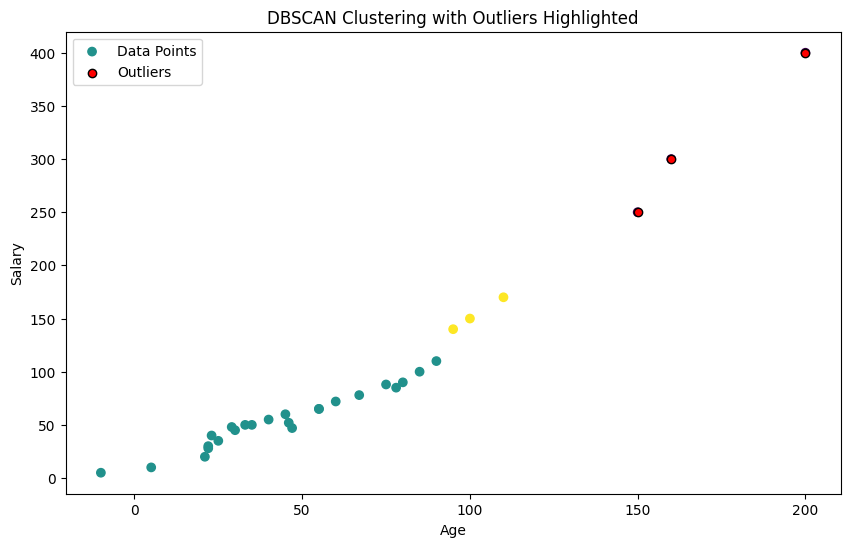

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Example dataset (2D data for better visualization)
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Convert the data into a NumPy array for DBSCAN
X = df[['Age', 'Salary']].values

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=25, min_samples=3)
dbscan.fit(X)

# Add DBSCAN labels to the DataFrame
df['Cluster'] = dbscan.labels_

# Identify outliers (DBSCAN labels them as -1)
outliers = df[df['Cluster'] == -1]

# Print the outliers
print("Outliers detected by DBSCAN:")
print(outliers)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df['Age'], df['Salary'], c=df['Cluster'], cmap='viridis', label='Data Points')

# Highlight the outliers
plt.scatter(outliers['Age'], outliers['Salary'], color='red', label='Outliers', edgecolors='black')

# Add title and labels
plt.title("DBSCAN Clustering with Outliers Highlighted")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, np.nan, 30, 78, 29, 33, 80, 90, 21, 22, np.nan, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, np.nan, 47, 50, 52, 65, 78, 40, np.nan, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, np.nan]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

df.head()

,Age,Salary
0,22.0,30.0
1,25.0,NaN
2,47.0,47.0
3,35.0,50.0
4,46.0,52.0


In [ ]:
### Step 1: Data Preprocessing ###
# Handling missing values (filling with mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Normalize/scale data for better handling of outliers
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Salary'] = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

print("Preprocessed Data:")
df.head()




Preprocessed Data:


,Age,Salary
0,-0.884085,-0.731952
1,-0.819452,0.000000
2,-0.345478,-0.535251
3,-0.604009,-0.500539
4,-0.367022,-0.477397


In [ ]:
### Step 2: Identifying Outliers (Z-score method) ###
df['Z_score_Age'] = stats.zscore(df['Age'])
df['Z_score_Salary'] = stats.zscore(df['Salary'])

# Z-score threshold for detecting outliers
z_threshold = 3

# Identify outliers based on Z-score
outliers_z = df[(df['Z_score_Age'].abs() > z_threshold) | (df['Z_score_Salary'].abs() > z_threshold)]
print("\nOutliers detected using Z-score method:")
outliers_z




Outliers detected using Z-score method:


,Age,Salary,Z_score_Age,Z_score_Salary
23,2.950798,3.549196,3.001242,3.609871


In [ ]:
### Step 3: Identifying Outliers (IQR method) ###
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

Q1_Salary = df['Salary'].quantile(0.25)
Q3_Salary = df['Salary'].quantile(0.75)
IQR_Salary = Q3_Salary - Q1_Salary

# Define bounds for outliers
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

lower_bound_Salary = Q1_Salary - 1.5 * IQR_Salary
upper_bound_Salary = Q3_Salary + 1.5 * IQR_Salary

# Identify outliers based on IQR
outliers_iqr = df[(df['Age'] < lower_bound_Age) | (df['Age'] > upper_bound_Age) |
                  (df['Salary'] < lower_bound_Salary) | (df['Salary'] > upper_bound_Salary)]

print("\nOutliers detected using IQR method:")
outliers_iqr




Outliers detected using IQR method:


,Age,Salary,Z_score_Age,Z_score_Salary
20,1.873583,1.813596,1.905613,1.844599
21,2.089026,2.392129,2.124739,2.433023
23,2.950798,3.549196,3.001242,3.609871
26,1.011812,0.887942,1.029109,0.903121


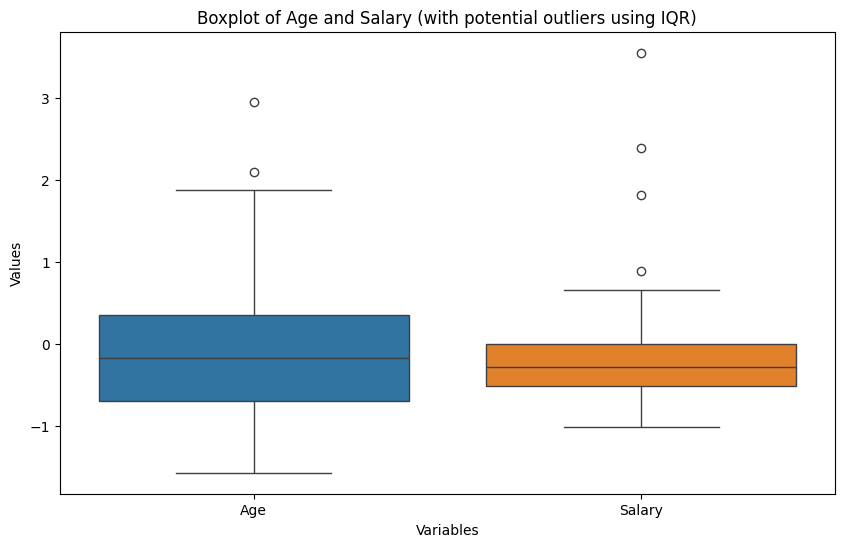

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Salary']])

# Add title and labels
plt.title('Boxplot of Age and Salary (with potential outliers using IQR)')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

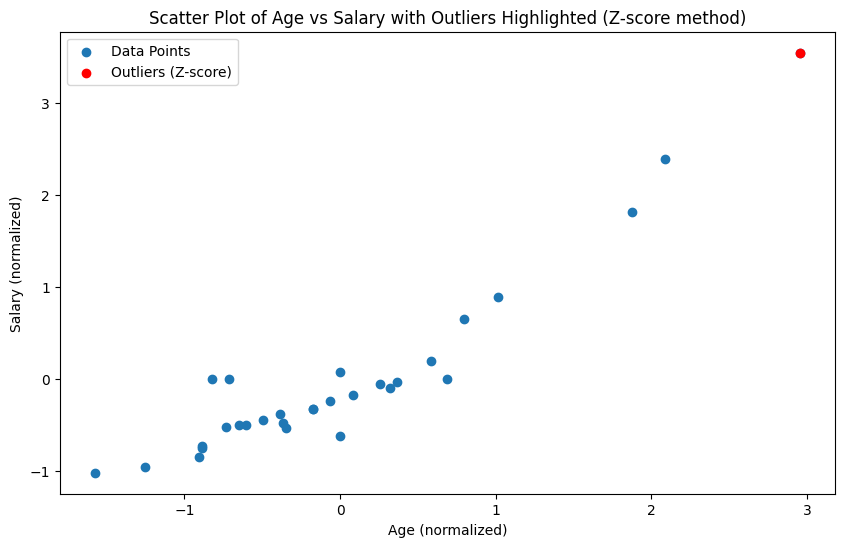

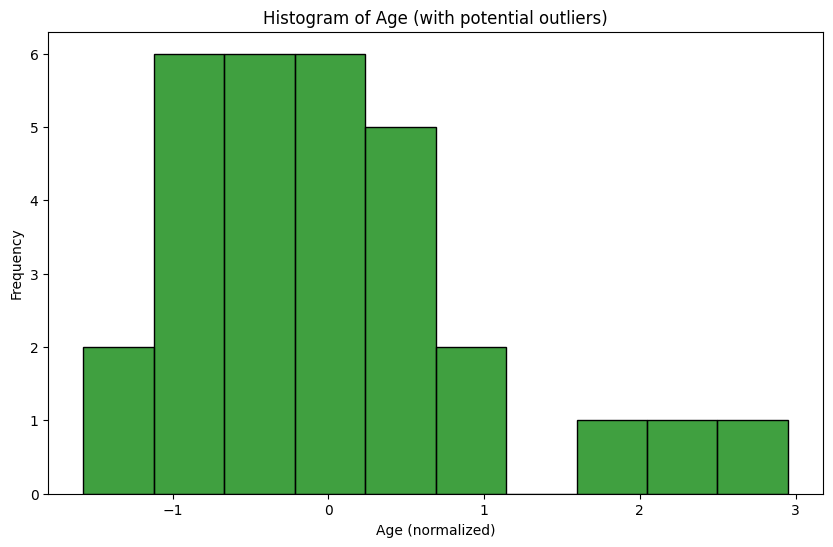

In [ ]:
### Step 4: Visualization ###
# Scatter plot to visualize Age vs Salary and outliers (Z-score method)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], label='Data Points')
plt.scatter(outliers_z['Age'], outliers_z['Salary'], color='red', label='Outliers (Z-score)')
plt.title('Scatter Plot of Age vs Salary with Outliers Highlighted (Z-score method)')
plt.xlabel('Age (normalized)')
plt.ylabel('Salary (normalized)')
plt.legend()
plt.show()

# Histogram to visualize the distribution of 'Age' and identify outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=False, color='green')
plt.title('Histogram of Age (with potential outliers)')
plt.xlabel('Age (normalized)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, 23, 30, 78, 29, 33, 80, 90, 21, 22, 85, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, 35, 47, 50, 52, 65, 78, 40, 45, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, 140]
}

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

df

,Age,Salary
0,22,30
1,25,35
2,47,47
3,35,50
4,46,52
5,55,65
6,67,78
7,23,40
8,30,45
9,78,85


In [ ]:
### Step 1: Detect Outliers using Z-score ###
df['Z_score_Age'] = stats.zscore(df['Age'])
df['Z_score_Salary'] = stats.zscore(df['Salary'])

# Define the threshold for detecting outliers
z_threshold = 3

# Identify outliers based on Z-score
outliers = df[(df['Z_score_Age'].abs() > z_threshold) | (df['Z_score_Salary'].abs() > z_threshold)]
print("Outliers Detected:")
outliers




Outliers Detected:


,Age,Salary,Z_score_Age,Z_score_Salary
23,200,400,2.965612,3.569709


In [ ]:
### Step 2: Treating Outliers ###

# 1. Removing Outliers
df_removed_outliers = df[(df['Z_score_Age'].abs() <= z_threshold) & (df['Z_score_Salary'].abs() <= z_threshold)]
print("\nData After Removing Outliers:")
df_removed_outliers




Data After Removing Outliers:


,Age,Salary,Z_score_Age,Z_score_Salary
0,22,30,-0.871647,-0.708392
1,25,35,-0.806974,-0.650580
2,47,47,-0.332706,-0.511830
3,35,50,-0.591398,-0.477143
4,46,52,-0.354264,-0.454018
5,55,65,-0.160245,-0.303707
6,67,78,0.098447,-0.153395
7,23,40,-0.850090,-0.592768
8,30,45,-0.699186,-0.534955
9,78,85,0.335581,-0.072458


In [ ]:
# 2. Capping/Flooring Outliers (using IQR method)
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

Q1_Salary = df['Salary'].quantile(0.25)
Q3_Salary = df['Salary'].quantile(0.75)
IQR_Salary = Q3_Salary - Q1_Salary

lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

lower_bound_Salary = Q1_Salary - 1.5 * IQR_Salary
upper_bound_Salary = Q3_Salary + 1.5 * IQR_Salary

df_capped = df.copy()
df_capped['Age'] = np.where(df_capped['Age'] < lower_bound_Age, lower_bound_Age, df_capped['Age'])
df_capped['Age'] = np.where(df_capped['Age'] > upper_bound_Age, upper_bound_Age, df_capped['Age'])
df_capped['Salary'] = np.where(df_capped['Salary'] < lower_bound_Salary, lower_bound_Salary, df_capped['Salary'])
df_capped['Salary'] = np.where(df_capped['Salary'] > upper_bound_Salary, upper_bound_Salary, df_capped['Salary'])
print("\nData After Capping/Flooring Outliers:")
df_capped




Data After Capping/Flooring Outliers:


,Age,Salary,Z_score_Age,Z_score_Salary
0,22.0,30.0,-0.871647,-0.708392
1,25.0,35.0,-0.806974,-0.650580
2,47.0,47.0,-0.332706,-0.511830
3,35.0,50.0,-0.591398,-0.477143
4,46.0,52.0,-0.354264,-0.454018
5,55.0,65.0,-0.160245,-0.303707
6,67.0,78.0,0.098447,-0.153395
7,23.0,40.0,-0.850090,-0.592768
8,30.0,45.0,-0.699186,-0.534955
9,78.0,85.0,0.335581,-0.072458


In [ ]:
# 3. Transforming Data (Logarithmic Transformation)
df_transformed_log = df.copy()
df_transformed_log['Age'] = np.log1p(df_transformed_log['Age'] - df_transformed_log['Age'].min() + 1)
df_transformed_log['Salary'] = np.log1p(df_transformed_log['Salary'] - df_transformed_log['Salary'].min() + 1)
print("\nData After Logarithmic Transformation:")
df_transformed_log




Data After Logarithmic Transformation:


,Age,Salary,Z_score_Age,Z_score_Salary
0,3.526361,3.295837,-0.871647,-0.708392
1,3.610918,3.465736,-0.806974,-0.650580
2,4.077537,3.784190,-0.332706,-0.511830
3,3.850148,3.850148,-0.591398,-0.477143
4,4.060443,3.891820,-0.354264,-0.454018
5,4.204693,4.127134,-0.160245,-0.303707
6,4.369448,4.317488,0.098447,-0.153395
7,3.555348,3.610918,-0.850090,-0.592768
8,3.737670,3.737670,-0.699186,-0.534955
9,4.499810,4.406719,0.335581,-0.072458


In [ ]:
# 4. Imputing Outliers with the Median
df_imputed = df.copy()
df_imputed['Age'] = np.where(df_imputed['Age'] > upper_bound_Age, df_imputed['Age'].median(), df_imputed['Age'])
df_imputed['Salary'] = np.where(df_imputed['Salary'] > upper_bound_Salary, df_imputed['Salary'].median(), df_imputed['Salary'])
print("\nData After Imputing Outliers with Median:")
df_imputed




Data After Imputing Outliers with Median:


,Age,Salary,Z_score_Age,Z_score_Salary
0,22.0,30.0,-0.871647,-0.708392
1,25.0,35.0,-0.806974,-0.650580
2,47.0,47.0,-0.332706,-0.511830
3,35.0,50.0,-0.591398,-0.477143
4,46.0,52.0,-0.354264,-0.454018
5,55.0,65.0,-0.160245,-0.303707
6,67.0,78.0,0.098447,-0.153395
7,23.0,40.0,-0.850090,-0.592768
8,30.0,45.0,-0.699186,-0.534955
9,78.0,85.0,0.335581,-0.072458


In [ ]:
# 5. Visual Inspection and Manual Adjustment
# Assuming manual adjustments are based on visual inspection or domain knowledge

# 6. Leave Outliers As Is (no changes made)
df_as_is = df.copy()
print("\nLeaving Outliers As Is:")
print(df_as_is)



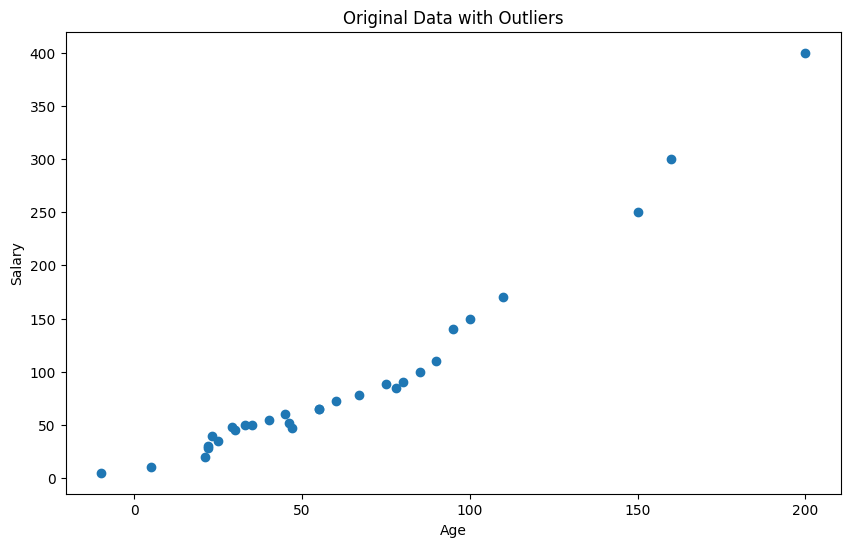

In [ ]:
### Step 3: Visualizing the Effects of Outlier Treatment ###

# Scatter plot to show original data
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], label='Original Data')
plt.title("Original Data with Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



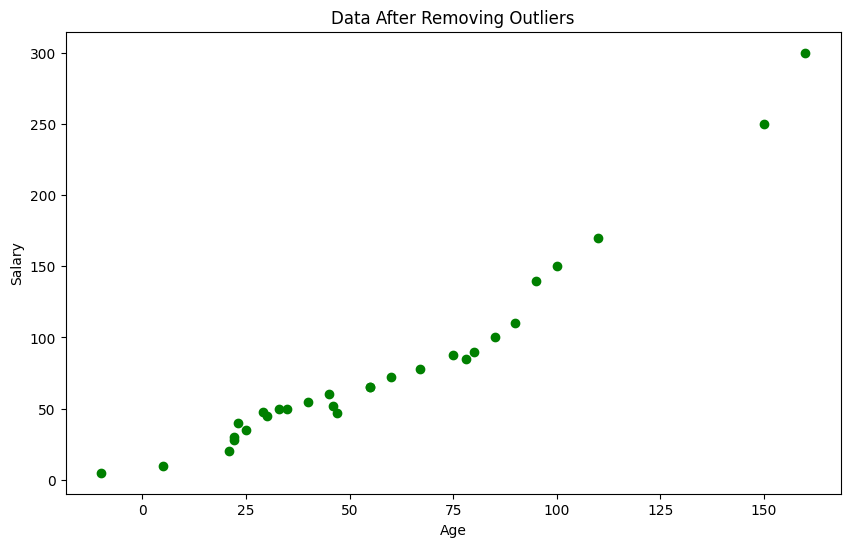

In [ ]:
# Scatter plot to show data after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_removed_outliers['Age'], df_removed_outliers['Salary'], color='green', label='Data After Removing Outliers')
plt.title("Data After Removing Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



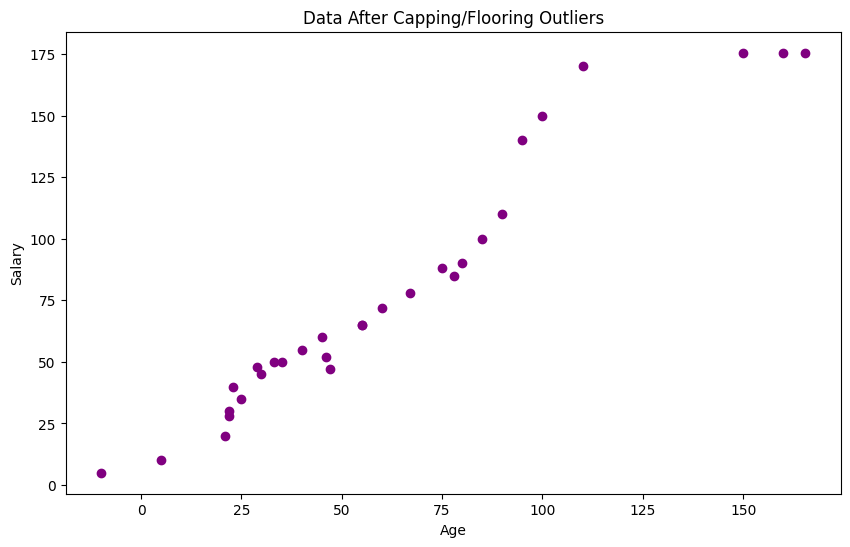

In [ ]:
# Scatter plot to show data after capping/flooring outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_capped['Age'], df_capped['Salary'], color='purple', label='Data After Capping/Flooring Outliers')
plt.title("Data After Capping/Flooring Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



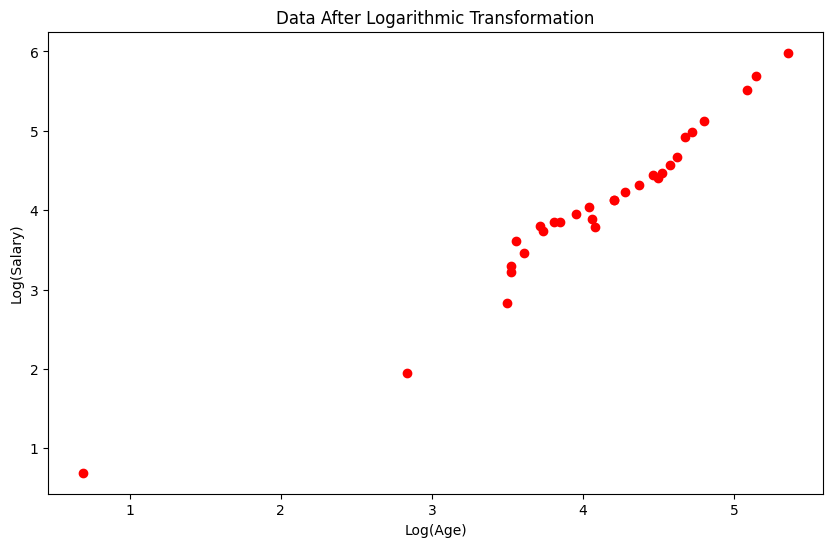

In [ ]:
# Scatter plot to show data after logarithmic transformation
plt.figure(figsize=(10, 6))
plt.scatter(df_transformed_log['Age'], df_transformed_log['Salary'], color='red', label='Data After Logarithmic Transformation')
plt.title("Data After Logarithmic Transformation")
plt.xlabel('Log(Age)')
plt.ylabel('Log(Salary)')
plt.show()



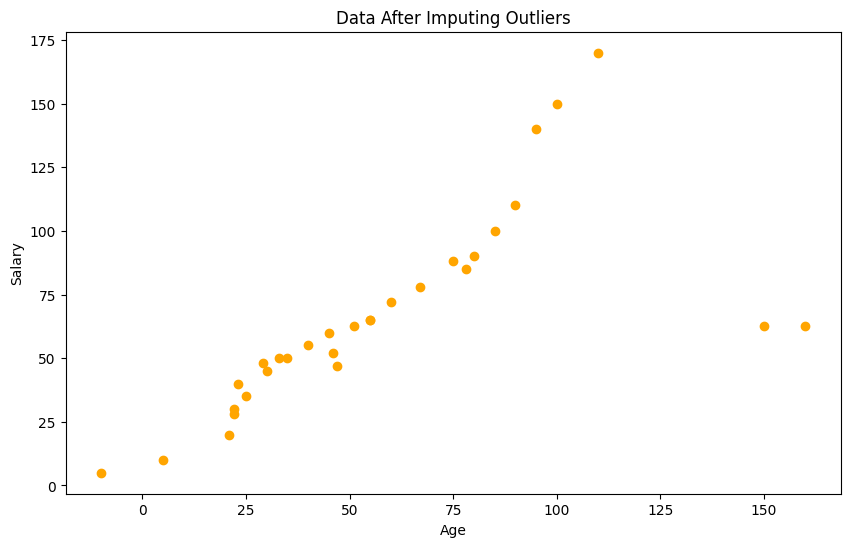

In [ ]:
# Scatter plot to show data after imputing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed['Age'], df_imputed['Salary'], color='orange', label='Data After Imputing Outliers')
plt.title("Data After Imputing Outliers")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



### **Lab Assignment 7: Methods to Identify Outliers**

---

#### **Objective:**
The goal of this lab assignment is to explore various methods for identifying outliers in a dataset. Outliers are data points that differ significantly from other observations and can impact the accuracy of models and analysis. You will apply different techniques to detect and handle these outliers.

---

### **Dataset:**
You will use the dataset below, which contains features related to students' academic performance, study hours, and family background.

```python
import pandas as pd
import numpy as np

# Example dataset
data = {
    'Student ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Age': [23, 21, 25, 27, 22, 24, 30, 19, 26, 35],
    'GPA': [3.5, 3.7, 2.8, 3.2, 4.0, 3.1, 3.9, 2.5, 3.6, 3.0],
    'Study Hours per Week': [15, 10, 25, 20, 5, 18, 30, 2, 20, 22],
    'Family Income ($)': [50000, 48000, 55000, 60000, 58000, 45000, 62000, 39000, 52000, 800000],  # Contains outlier
    'Extracurricular Activities': [2, 3, 1, 0, 5, 4, 1, 6, 2, 3]
}

df = pd.DataFrame(data)

# Display the dataset
print(df)
```

---


### **Tasks**:

1. **Understand the Data**:
   - Explore the dataset using basic descriptive statistics and visualizations.
   - Identify which columns are numerical and may contain outliers.

2. **Techniques for Identifying Outliers**:
   You will use the following methods to detect outliers in the **GPA**, **Study Hours per Week**, and **Family Income** columns.

---

### **Methods to Identify Outliers**:

#### **1. Z-Score Method**:
The Z-score is a measure of how many standard deviations a data point is from the mean. If the Z-score of a data point is greater than 3 or less than -3, it can be considered an outlier.


#### **2. Interquartile Range (IQR) Method**:
The IQR method identifies outliers by calculating the range between the first (Q1) and third quartiles (Q3). Outliers are typically considered as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.



#### **3. Box Plot**:
A box plot is a graphical method to visualize outliers. The box represents the interquartile range, and points outside the whiskers are considered outliers.



#### **4. Visualizing Outliers Using Scatter Plot**:
Scatter plots can help visualize outliers in relation to other variables.



---
